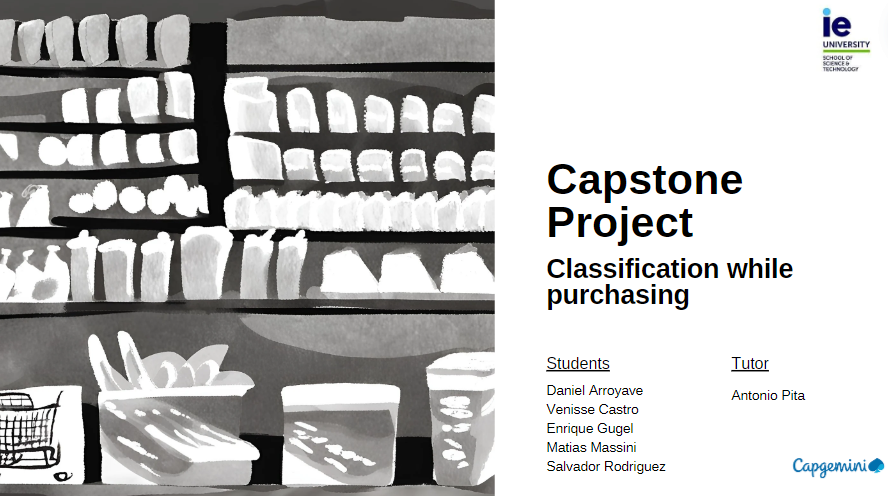

The purpose of this notebook is to identify the cluster to whom an order can be assigned.

# **1.   Libraries to be imported**



In [ ]:
import os
from google.colab import drive
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import KFold

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib


# **2.   Import Data**

We will create a Dataframe with each of the excel files providede by Capgemini



In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Update the route to access the data:
#route = '/content/drive/My Drive/CAPSTONE/Dataset_cleaned_merged/df_final_version.csv'
#destination = '/content/drive/My Drive/CAPSTONE/Dataset_cleaned_merged/Cluster_models/'

#in case you accessing the google shared drive use this and discard the previous by adding a # before and deleting the # in the next line:
route = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged/df_final_version.csv'
destination = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged/Cluster_models/'

In [ ]:
# Path to the CSV file
file_path = route
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [ ]:
pruduct_info = df[['id_producto', 'nombre_producto', 'id_pasillo','id_departamento','pasillo', 'departamento' ]]
pruduct_info =  pruduct_info.drop_duplicates(subset=['id_producto'])
pruduct_info =  pruduct_info.set_index('id_producto')

# **Upload Classification Model**

In [ ]:
# upload model
model_path1 = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged/Cluster_models/random_forest_model.joblib'
model_path2 = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged/Cluster_models/feature_names.joblib'
clf = joblib.load(model_path1)
feature_names = joblib.load(model_path2)

In [ ]:
def create_filtered_product_dataframe(pruduct_info, product_list):

    filtered_df = pruduct_info[pruduct_info['nombre_producto'].isin(product_list)]

    # Count the number of items per Aisle
    df_counts = filtered_df.groupby('pasillo').size().reset_index(name='counts')

    # Create a DataFrame with the desired structure
    aisles = pruduct_info['pasillo'].unique()
    data = {f'department_{aisle}': [0] for aisle in aisles}

    # Fill with data
    for _, row in df_counts.iterrows():
        data[f'department_{row["pasillo"]}'] = [row['counts']]

    # Convert the dictionary into a DataFrame
    df_final = pd.DataFrame(data)

    df_final = df_final[feature_names]

    return df_final


# **Sales Initiation**

In [ ]:
product_list = [
    'EL YOGUR DE BULGARIA',
    'CORAZONES DE APIO ORGÁNICOS',
    'KIRBY PEPINO',
    'ESPINACA ORGÁNICA DEL BEBÉ',
    'LIMAS',
    'NATURAL ARTESIANO DE AGUA',
    'ORGÁNICA DE HALF & HALF',
    'SIN AZÚCAR ORGÁNICA LECHE DE ALMENDRAS',
    'LIMÓN GRANDE'
    ]

In [ ]:
sale = create_filtered_product_dataframe(pruduct_info, product_list)


# **Cluster Prediction**

In [ ]:
predictions = clf.predict(sale)
print("Predicciones del cluster:", predictions)

Predicciones del cluster: [2]
